# Линейные модели,с лучайные леса и бустинги для предсказания временных рядов.

*В рамках задачи по предсказанию индекса качества воздуха в городе Берлин были проведены эксперименты с несолькими группами данных и моделями*.<br>

Задача: прогнозировать индекс качества воздуха на некоторый период времени.<br> 
*(Индекс качества воздуза считается как наибольший расчетный индекс из определенного количетсва загрязнителей.)*

Период временного ряда 2013-2020 год (подневно).

В качестве Baseline была взята взята функция предскаызвающая на ***n*** дней вперед по среднем за ***n*** дней. 

Наилучшая предыдущая модель - SARIMAX. 

MAE(среднее)  Baseline - 9.3<br>
МАЕ(среднее) SARIMAX - 8.32

# Для Checpoint5 по проекту были построены 3 типа моделей: <br>
- Линейные модели <br>
- Случайный лес <br>
- Бустинги

# Исходные данные:

В качестве данных в различных моделях выступали : <br>
- Данные о концентрации воздуха<br>
- Данные об индексах по загрязнителям (рассчитаны в соотвествии с EPA *агентство по охране окружающей среды США* на основе концентрации загрязнителей)<br>
- Расширенные данные с дополнительными  характеристиками по дню<br>

In [ ]:
#Имопртирование модулей
import pandas as pd
from fastai.tabular.core import add_datepart

#Формирование датасетов
data = pd.read_csv("https://raw.githubusercontent.com/dmitry-chvdr/aqi_prediction/Checkpoint4/ts_air_quality_index_2013_2020.csv")
data_with_character_of_day = pd.read_csv("https://raw.githubusercontent.com/dmitry-chvdr/aqi_prediction/Checkpoint4/ts_air_quality_index_2013_2020.csv")

#Добавим данные привязку к дню года
add_datepart(data_with_character_of_day, 'Date', drop=False)
for i in ["Is_month_end","Is_month_start","Is_quarter_end","Is_quarter_start","Is_year_end","Is_year_start"]:
  data_with_character_of_day[f'{i}'] = data_with_character_of_day[f'{i}'].map({True:1,False:0})

In [ ]:
#Представление данных в виде DataFrame.
data.head(3)

,CO_Concentration,NO2_Concentration,O3_Concentration,PM10_Concentration,PM2.5_Concentration,SO2_Concentration,Date,SO2_index,PM10_index,PM2.5_index,O3_index,NO2_index,CO_index,aqi
0,0.511042,30.759775,49.709444,204.521183,42.600000,13.191861,2013-01-01,7,125,118,46,15,0,125
1,0.513333,26.054568,52.687887,15.570061,25.800000,1.925773,2013-01-02,1,14,79,48,13,0,79
2,0.473333,31.372220,40.397083,13.538415,20.046667,2.064878,2013-01-03,1,12,67,37,15,0,67


In [ ]:
#Пример данных с доп. характеристикой по дню
data_with_character_of_day.head(3)

,CO_Concentration,NO2_Concentration,O3_Concentration,PM10_Concentration,PM2.5_Concentration,SO2_Concentration,Date,SO2_index,PM10_index,PM2.5_index,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0.511042,30.759775,49.709444,204.521183,42.600000,13.191861,2013-01-01,7,125,118,...,1,1,1,0,1,0,1,0,1,1.356998e+09
1,0.513333,26.054568,52.687887,15.570061,25.800000,1.925773,2013-01-02,1,14,79,...,2,2,2,0,0,0,0,0,0,1.357085e+09
2,0.473333,31.372220,40.397083,13.538415,20.046667,2.064878,2013-01-03,1,12,67,...,3,3,3,0,0,0,0,0,0,1.357171e+09


Были построены следующие модели:

# Линейные модели

1. Линейная регрессия.<br>
2. Линейная регрессия со сдвигом временного ряда.<br>
3. Регрессия опорных векторов.<br>
4. Логистическая регрессия.<br>

# Случайный лес и бустинги

 1. Случайный лес с учетом сезонной компоненты. (входные данные - временной ряд  ['aqi'] , ['Date'] , *дополнительный сдвиг по сезонной компоненте,логарифмирование для нормализации*.<br><br>
 2. Случайный лес без сезонной компоненты. (входные данные - временной ряд  ['aqi'] , ['Date'] .<br><br>
 3. Случайный лес обученный на части признаков с ограниченным количеством данных. (входные данные - матрица признаков ["aqi" , "CO_Concentration" , "PM10_Concentration" , "PM2.5_Concentration" ] ).<br><br>
 4. Случайный лес обученный на части признаков с ограниченным количеством данных. (входные данные - матрица признаков на основе подиндексов качества воздуха  [ "aqi" , "CO_index" , "PM10_index" , "PM2.5_index" ]).<br><br>
 5. Обучен Бустинг (XGBoost Regressor) (входные данные - матрица признаков на основе части подиндексов качества воздуха ["CO_index" , "PM10_index" , "PM2.5_index" ].<br><br>
 6. Обучен Бустинг (XGBoost Regressor) (входные данные - матрица признаков[ "CO_Concentration" , "PM10_Concentration" , "PM2.5_Concentration" ].<br><br>
 7.Обучен Бустинг (XGBoost Regressor) (входные данные - полная матрица из подиндексов качества воздуха. ["CO_Concentration" , "PM10_Concentration" , "PM2.5_Concentration" ].<br><br>
 8..Обучен Бустинг (XGBoost Regressor) (входные данные - матрица дополненная характеристиками даты "день недели" , " день года" , "Выходной день". 

# Визуализация наилучших результатов:

Визуализация линейных моделей:

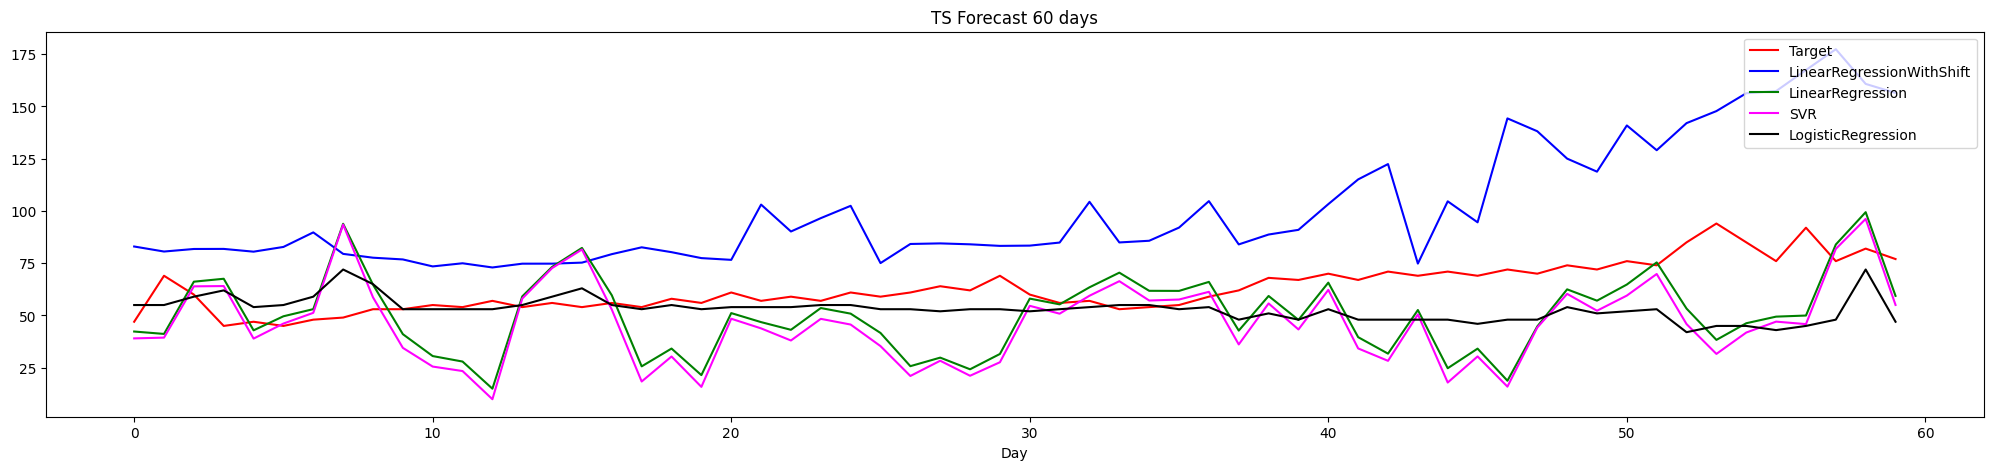

Визуализация случайных лесов и бустингов.

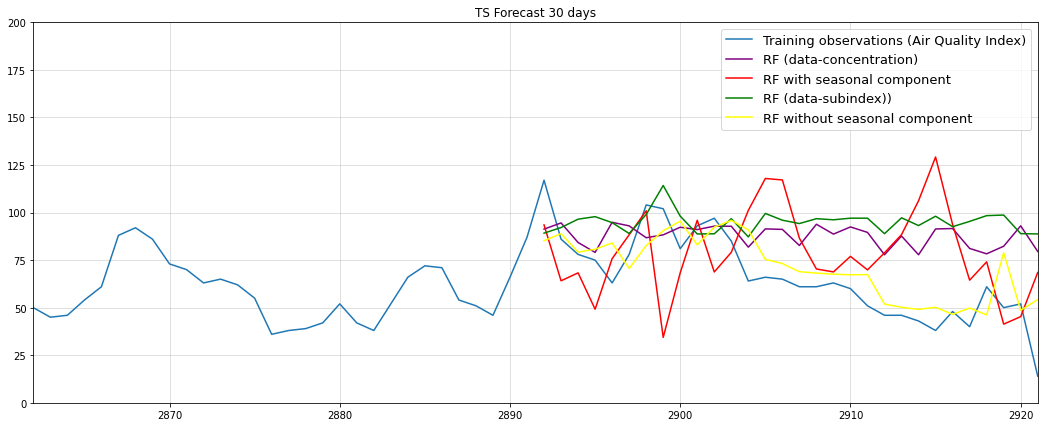

In [ ]:
#Визуализация предскзааний случаных лесов на 30 дней

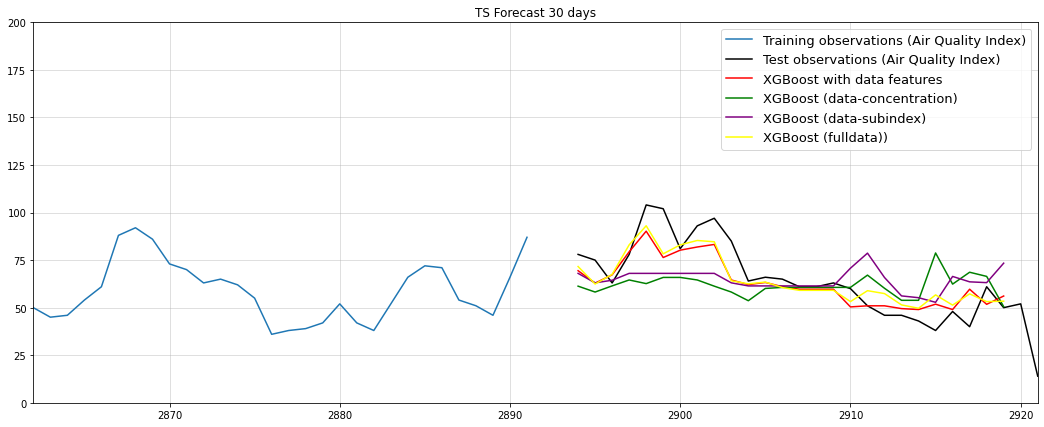

In [ ]:
# Визуализация предсказаний бустингов на 30 дней

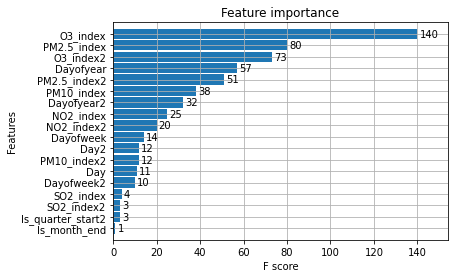

In [ ]:
#Дополнительно визуализируем важность признаков для 8 эксперимента (XGBoost). Данные - с дополнительными признаками по дням.
_ = xgb.plot_importance(reg, height=0.9)

# Метрики качества моделей.<br>
Для оценки качества построенных моделей была взята средняя абсолютная ошибка MAE.<br>
Для моделей получены следующий результаты.

 1. Случайный лес с учетом сезонной компоненты. МАЕ=21.2<br>
 2. Случайный лес без сезонной компоненты. МАЕ=11.9 .<br>
 3. Случайный лес обученный на части признаков с ограниченным количеством данных. МАЕ=31.0<br>
 4. Случайный лес обученный на части признаков с ограниченным количеством данных. МАЕ=34.2<br>
 5. Бустинг (XGBoost Regressor)  МАЕ=16.2<br>
 6. Бустинг (XGBoost Regressor) МАЕ=16.1<br>
 7. Бустинг (XGBoost Regressor) МАЕ=8.2><br>
 8. Бустинг (XGBoost Regressor) (входные данные - матрица дополненная характеристиками даты) МАЕ=7.5.